In [ ]:
# Reconocimiento de Instrumentos Musicales con IRMAS 🎶🎧

Este notebook utiliza el dataset IRMAS para entrenar un modelo que detecte qué instrumento predomina en fragmentos de audio. Exploramos espectrogramas, extraemos características con `librosa`, y entrenamos un modelo de clasificación.


In [3]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

In [5]:
import os
import glob

# Ruta al dataset IRMAS
data_path = '/home/mariano/ia_env/data/audio/IRMAS-TrainingData' # adaptá según tu sistema

print(os.path.exists(data_path))  # Debería devolver True

len(glob.glob(data_path + '/**/*.wav', recursive=True))


# Etiquetas disponibles en el nombre del archivo
etiquetas = []
archivos = []

for root, _, files in os.walk(data_path):
    for file in files:
        if re.match(r".*\.wav$", file):  # solo archivos .wav reales
            try:
                label = re.search(r"\[(\w{3})\]", file).group(1)
                path = os.path.join(root, file)
                etiquetas.append(label)
                archivos.append(path)
            except:
                continue  # saltea si no encuentra etiqueta


df = pd.DataFrame({'archivo': archivos, 'instrumento': etiquetas})
df.head()

print(df.shape)
print(df.head())

True
(6705, 2)
                                             archivo instrumento
0  /home/mariano/ia_env/data/audio/IRMAS-Training...         voi
1  /home/mariano/ia_env/data/audio/IRMAS-Training...         voi
2  /home/mariano/ia_env/data/audio/IRMAS-Training...         voi
3  /home/mariano/ia_env/data/audio/IRMAS-Training...         voi
4  /home/mariano/ia_env/data/audio/IRMAS-Training...         voi


In [6]:
def extraer_mfcc(ruta, n_mfcc=13):
    y, sr = librosa.load(ruta, duration=3, sr=22050)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)

X = []
y = []

for ruta, etiqueta in tqdm(zip(df['archivo'], df['instrumento']), total=len(df)):
    try:
        mfcc = extraer_mfcc(ruta)
        X.append(mfcc)
        y.append(etiqueta)
    except:
        continue  # saltea archivos corruptos

X = np.array(X)
y = np.array(y)

100%|██████████| 6705/6705 [02:44<00:00, 40.76it/s]


In [7]:
print(f"MFCCs extraídos: {len(X)} muestras")

MFCCs extraídos: 6705 muestras


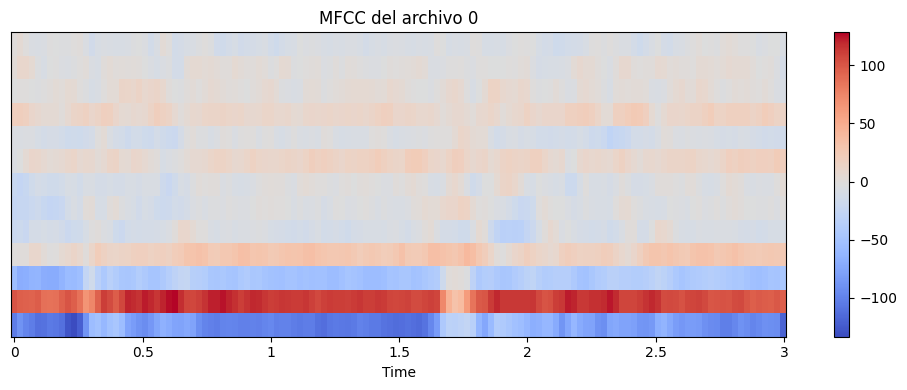

In [8]:
import librosa.display
import matplotlib.pyplot as plt

y_audio, sr = librosa.load(df['archivo'][0], duration=3)
mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC del archivo 0')
plt.tight_layout()
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento
modelo = RandomForestClassifier(n_estimators=100, random_state=0)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cel       0.69      0.66      0.68        76
         cla       0.72      0.57      0.64       101
         flu       0.57      0.32      0.41        84
         gac       0.51      0.61      0.55       127
         gel       0.55      0.61      0.58       150
         org       0.47      0.66      0.55       135
         pia       0.60      0.60      0.60       157
         sax       0.56      0.38      0.45       117
         tru       0.53      0.46      0.49       104
         vio       0.58      0.49      0.53       116
         voi       0.53      0.63      0.57       174

    accuracy                           0.56      1341
   macro avg       0.57      0.54      0.55      1341
weighted avg       0.56      0.56      0.55      1341



In [10]:
glob.glob('/home/mariano/ia_env/data/audio/test/*.wav')

['/home/mariano/ia_env/data/audio/test/saxofon2.wav',
 '/home/mariano/ia_env/data/audio/test/flauta_.wav',
 '/home/mariano/ia_env/data/audio/test/violonchelo2.wav',
 '/home/mariano/ia_env/data/audio/test/trompeta2.wav',
 '/home/mariano/ia_env/data/audio/test/violonchelo.wav',
 '/home/mariano/ia_env/data/audio/test/trompeta.wav',
 '/home/mariano/ia_env/data/audio/test/violin2.wav',
 '/home/mariano/ia_env/data/audio/test/saxofon.wav',
 '/home/mariano/ia_env/data/audio/test/flauta5.wav']

In [11]:
# Funcion para predecir instrumento en un nuevo .wav
def predecir_instrumento(modelo, ruta_audio, n_mfcc=13):
    y, sr = librosa.load(ruta_audio, duration=3, sr=22050)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    entrada = np.mean(mfccs.T, axis=0).reshape(1, -1)
    pred = modelo.predict(entrada)[0]
    return pred

In [21]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/saxofon2.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: tru


In [22]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/flauta_.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: flu


In [23]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/violonchelo2.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: cel


In [24]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/trompeta2.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: tru


In [25]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/violonchelo.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: pia


In [26]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/trompeta.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: vio


In [27]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/violin2.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: sax


In [28]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/saxofon.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: sax


In [29]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/flauta5.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: tru


In [ ]:
## El modelo acerto 4 de 9 muestras. Ahora vamos a afinar el modelo con mas parametros

In [ ]:
## Paso 1: Expansión de Features (MFCC + ZCR + Centroid + Chroma)

In [31]:
def extraer_features_completo(ruta):
    y, sr = librosa.load(ruta, duration=3, sr=22050)

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    zcr = librosa.feature.zero_crossing_rate(y)
    sc = librosa.feature.spectral_centroid(y=y, sr=sr)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    features = np.concatenate([
        np.mean(mfccs.T, axis=0),
        np.mean(zcr.T, axis=0),
        np.mean(sc.T, axis=0),
        np.mean(chroma.T, axis=0)
    ])
    return features

In [ ]:
## Paso 2 : RECALCULAR X y

In [32]:
X = []
y = []

for ruta, etiqueta in tqdm(zip(df['archivo'], df['instrumento']), total=len(df)):
    try:
        feats = extraer_features_completo(ruta)
        X.append(feats)
        y.append(etiqueta)
    except Exception as e:
        print(f"Error en {ruta}: {e}")
        continue

X = np.array(X)
y = np.array(y)

100%|██████████| 6705/6705 [04:40<00:00, 23.93it/s]


In [ ]:
Paso 3 : Ajuste de hiperparametros con GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=param_grid,
    cv=3,  # validación cruzada en 3 particiones
    n_jobs=-1,  # usa todos los núcleos disponibles
    verbose=2
)

grid_search.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


,estimator,RandomForestC...andom_state=0)
,param_grid,"{'class_weight': ['balanced'], 'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [36]:
print("🎯 Mejores parámetros encontrados:")
print(grid_search.best_params_)

🎯 Mejores parámetros encontrados:
{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
Paso 4 : EVALUAR EL MODELO MEJORADO

In [51]:
modelo_optimo = grid_search.best_estimator_

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

modelo_optimo.fit(X_train, y_train)
y_pred = modelo_optimo.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cel       0.66      0.59      0.62        78
         cla       0.60      0.51      0.56       101
         flu       0.60      0.40      0.48        90
         gac       0.55      0.66      0.60       127
         gel       0.61      0.50      0.55       152
         org       0.55      0.72      0.62       136
         pia       0.52      0.60      0.56       144
         sax       0.55      0.30      0.39       125
         tru       0.66      0.48      0.56       116
         vio       0.61      0.47      0.53       116
         voi       0.41      0.69      0.52       156

    accuracy                           0.55      1341
   macro avg       0.57      0.54      0.54      1341
weighted avg       0.57      0.55      0.54      1341



In [52]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/flauta_.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: flu


In [53]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/violonchelo2.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: cel


In [54]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/trompeta2.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: tru


In [55]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/violonchelo.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: pia


In [56]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/trompeta.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: vio


In [57]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/violin2.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: sax


In [58]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/saxofon.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: sax


In [59]:
ruta_nueva = '/home/mariano/ia_env/data/audio/test/flauta5.wav'  # cambiala según tu archivo
instrumento = predecir_instrumento(modelo, ruta_nueva)
print(f"🎶 El modelo detectó: {instrumento}")

🎶 El modelo detectó: tru


In [63]:
##GUARDAR EL MODELO

In [ ]:
import joblib

# Guardar el modelo optimizado
joblib.dump(modelo_optimo, 'modelo_instrumentos.pkl')

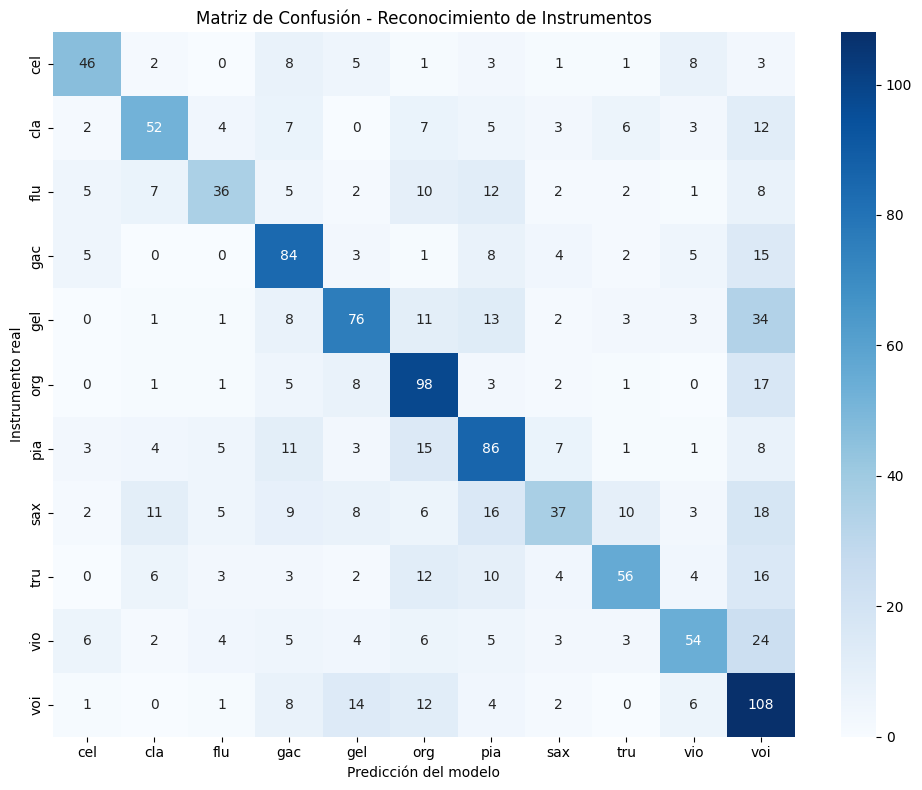

In [64]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz
cm = confusion_matrix(y_test, y_pred, labels=modelo_optimo.classes_)

# Visualizarla
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=modelo_optimo.classes_,
            yticklabels=modelo_optimo.classes_)
plt.title("Matriz de Confusión - Reconocimiento de Instrumentos")
plt.xlabel("Predicción del modelo")
plt.ylabel("Instrumento real")
plt.tight_layout()
plt.show()